# EDA: Global Terrorism 1970-2017


The aim of this notebook is to look at trends in terrorism through data visualizations. The dataset is taken from START Consortium's global terrorism database which can be found on Kaggle:
<br>
https://www.kaggle.com/START-UMD/gtd

### Setting up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',engine='python')

In [3]:
df = df[['iyear','imonth','iday','extended','country_txt','region_txt','attacktype1_txt','city','targtype1_txt','nkill','nwound','gname']]
df['casualties'] = df['nkill'] + df['nwound']
df.head()

,iyear,imonth,iday,extended,country_txt,region_txt,attacktype1_txt,city,targtype1_txt,nkill,nwound,gname,casualties
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Assassination,Santo Domingo,Private Citizens & Property,1.0,0.0,MANO-D,1.0
1,1970,0,0,0,Mexico,North America,Hostage Taking (Kidnapping),Mexico city,Government (Diplomatic),0.0,0.0,23rd of September Communist League,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Assassination,Unknown,Journalists & Media,1.0,0.0,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Bombing/Explosion,Athens,Government (Diplomatic),NaN,NaN,Unknown,NaN
4,1970,1,0,0,Japan,East Asia,Facility/Infrastructure Attack,Fukouka,Government (Diplomatic),NaN,NaN,Unknown,NaN


# 1. General visualizations
### i. The rise of terrorism

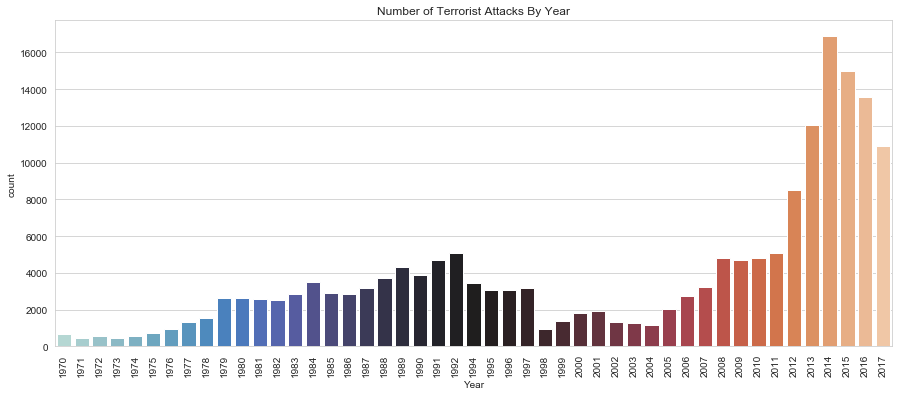

In [4]:
plt.figure(figsize=(15,6))
sns.countplot(df['iyear'],palette='icefire')
plt.xticks(rotation = 90)
plt.title('Number of Terrorist Attacks By Year');
plt.xlabel('Year')
plt.show()

Interestingly, the number of terrorist acts dip at the turn of the century from 1998 to 2004. However, some of the deadliest attacks in history have occured during this time period.

### ii. Methods of attack

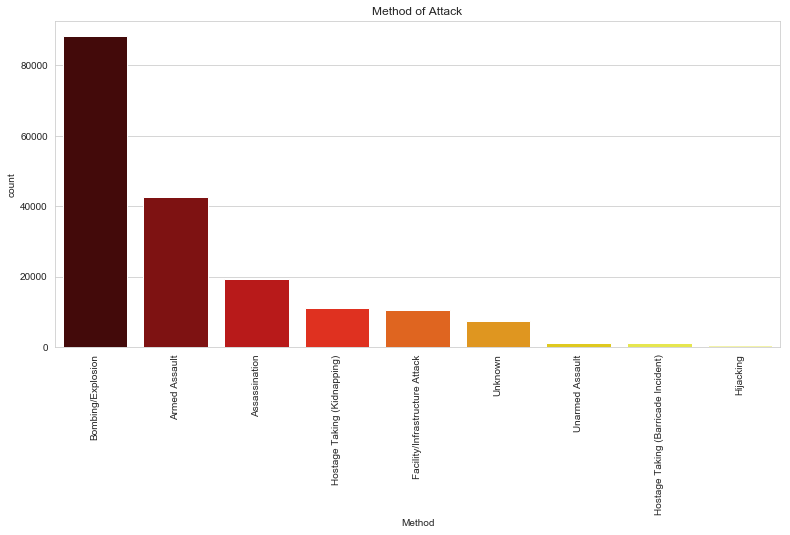

In [5]:
plt.figure(figsize=(13,6))
sns.countplot(df['attacktype1_txt'],data=df,order=df['attacktype1_txt'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

### iii. Country and region

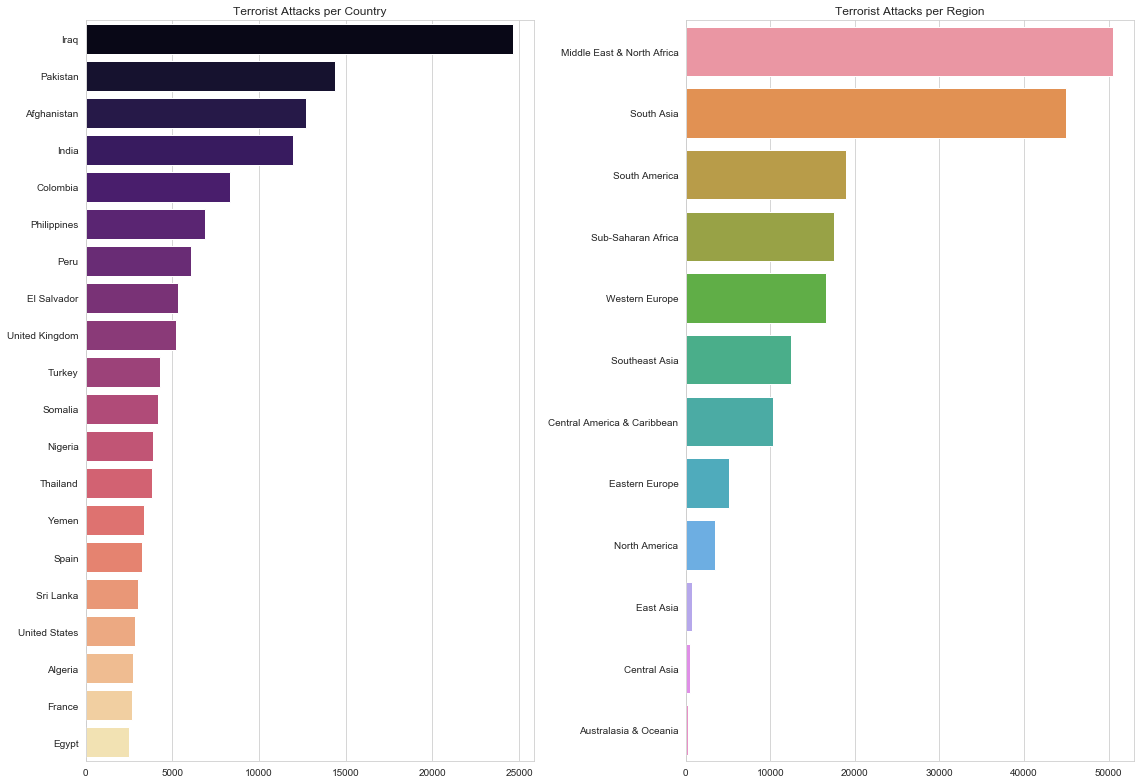

In [6]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df['country_txt'].value_counts()[:20].values, y = df['country_txt'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=df['region_txt'].value_counts().values,y=df['region_txt'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

### iv. Most active organizations

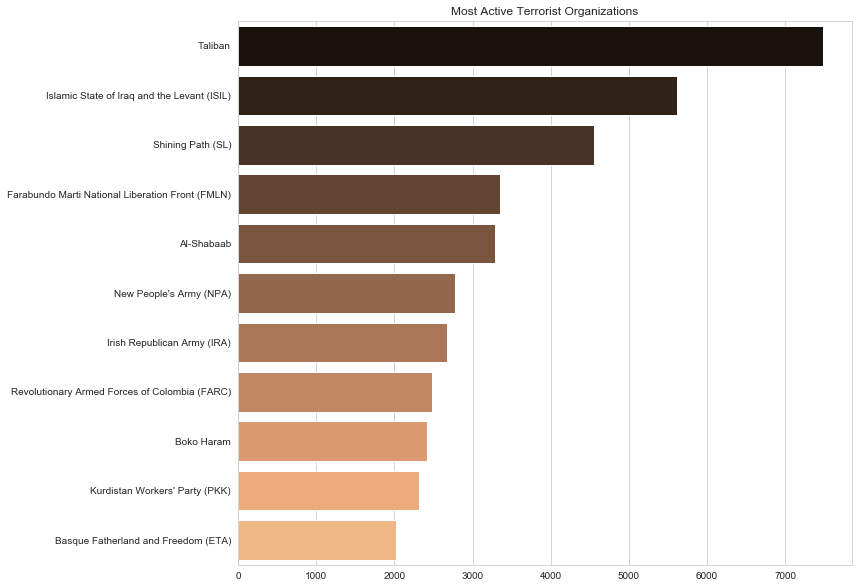

In [7]:
plt.subplots(figsize=(11,10))
sns.barplot(y=df['gname'].value_counts()[1:12].index,x=df['gname'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

### v. Most affected targets

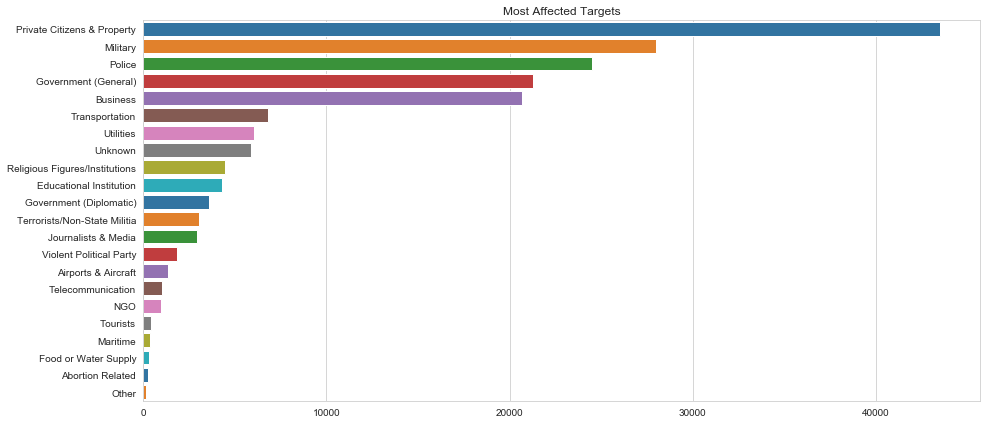

In [8]:
plt.subplots(figsize=(15,7))
sns.barplot(y=df['targtype1_txt'].value_counts().index,x=df['targtype1_txt'].value_counts().values,
           palette='tab10')
plt.title('Most Affected Targets')
plt.show()

# 2. A closer look at trends


### i. Large spikes in the average number of casualties per year are associated with landmark terrorist events

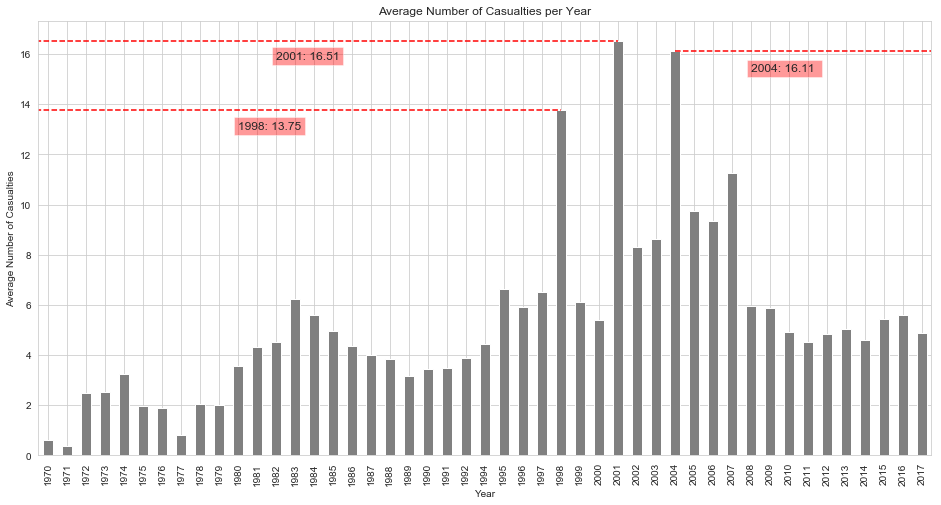

In [9]:
fig,axes = plt.subplots(figsize=(16,8))
avg_casualties = df.groupby('iyear').mean()['casualties']
avg_casualties.plot.bar(color='grey')
plt.xlabel('Year')
plt.ylabel('Average Number of Casualties')
plt.title('Average Number of Casualties per Year')
plt.hlines(y=avg_casualties.loc[1998],colors='red',xmin=-4,xmax=27,linestyles='--')
plt.hlines(y=avg_casualties.loc[2001],colors='red',xmin=-4,xmax=30,linestyles='--')
plt.hlines(y=avg_casualties.loc[2004],colors='red',xmin=33,xmax=50,linestyles='--')
plt.text(10, 13, '1998: 13.75',fontsize=12,bbox=dict(facecolor='red', alpha=0.4))
plt.text(12, 15.8, '2001: 16.51',fontsize=12,bbox=dict(facecolor='red', alpha=0.4))
plt.text(37, 15.3, '2004: 16.11 ',fontsize=12,bbox=dict(facecolor='red', alpha=0.4))
plt.show()

1998 - US Embassy bombings in Kenya and Tanzania (4,200+ casualties)
<br>
2001 - 9/11 WTC and Pentagon attacks (approx. 10,000 casualties)
<br>
2004 - Madrid train bombings (2,000+ casualties)
<br>
<br>
The ability for these events to draw their respective years' average casualties so high really shows their significance.

### ii. Before and after the War on Terror

After the 9/11 attacks in New York City, the US-led War on Terror was launched with the goal to distinguish terrorism primarily in the Middle East. Here, it is shown as a turning point for activity patterns in each region.

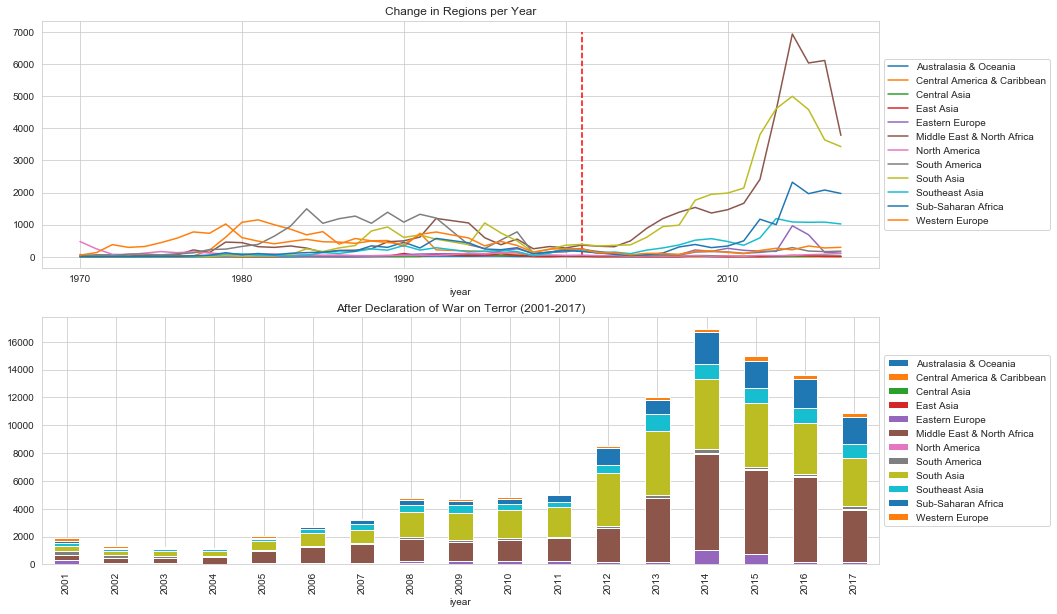

In [10]:
df_after = df[df['iyear']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(df.iyear,df.region_txt).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(df_after.iyear,df_after.region_txt).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

From the first plot, it is very noticeable that the terrorism landscape before and after the War on Terror is vastly different. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.     

### iii. The shift from Western Europe to Eastern Europe

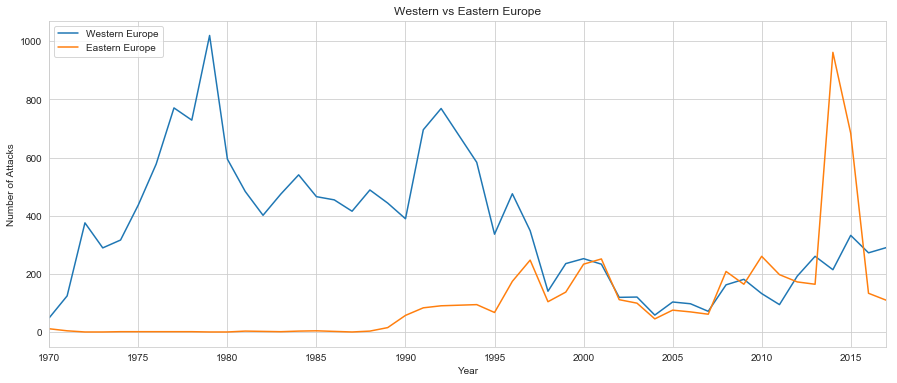

In [11]:
fig,axes = plt.subplots(figsize=(15,6))
sns.lineplot(df[df['region_txt']=='Western Europe']['iyear'].value_counts().index,
             df[df['region_txt']=='Western Europe']['iyear'].value_counts().values)
sns.lineplot(df[df['region_txt']=='Eastern Europe']['iyear'].value_counts().index,
             df[df['region_txt']=='Eastern Europe']['iyear'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,5))
plt.xlim(1970,2017)
plt.ylabel('Number of Attacks')
plt.title('Western vs Eastern Europe')
axes.legend(labels=['Western Europe','Eastern Europe'])
plt.show()

Though Western Europe has seen considerably more terrorism in the past, there is now a shift in activity towards the east. 1991 seems to be a turning point here considering the dissolution of the Soviet Union at the time and the numerous accounts of unrest that followed. The spike at 2014 can be attributed to the recent Ukrainian revolution and related Ukrainian-Russian conflicts such as the war in Donbass. The following plots show the number of Russia and Ukraine's terrorist events compared to the rest of Eastern Europe.

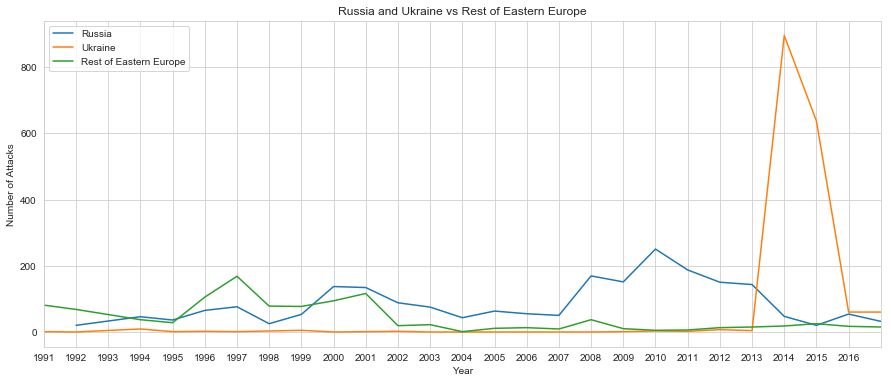

In [12]:
fig,ax = plt.subplots(figsize=(15,6))
russia = df[(df['country_txt']=='Russia') & (df['iyear'].between(1991,2017,inclusive=True))]['iyear'].value_counts()
ukraine = df[(df['country_txt']=='Ukraine') & (df['iyear'].between(1991,2017,inclusive=True))]['iyear'].value_counts()
rest_east = df[(df['country_txt']!='Russia') & (df['country_txt']!='Ukraine')
               & (df['region_txt']=='Eastern Europe')& (df['iyear'].between(1991,2017,inclusive=True))]['iyear'].value_counts()
sns.lineplot(x=russia.index,y=russia.values)
sns.lineplot(x=ukraine.index,y=ukraine.values)
sns.lineplot(x=rest_east.index,y=rest_east.values)
plt.xticks(np.arange(1991,2017,1))
plt.xlim(1991,2017)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Russia and Ukraine vs Rest of Eastern Europe')
ax.legend(labels=['Russia','Ukraine','Rest of Eastern Europe'])
plt.show()

Clearly, Russia and Ukraine are the main contributers to this shift. Ukraine's isolated spike in 2014 shown here is nearly identical to the previous plot. A large majority of Eastern European terrorism in the past couple years has been found in Ukraine. 
<br>
<br>
For more information, there's a great article on the Washington Post:
<br>https://www.washingtonpost.com/graphics/world/a-history-of-terrorism-in-europe/

### iv. Are extended attacks more lethal?
Extended attacks are defined as events that last longer than 24 hours. Does a longer timeframe mean a higher rate of casualties? Lets first look at which methods of attack tend to be extended or unextended.

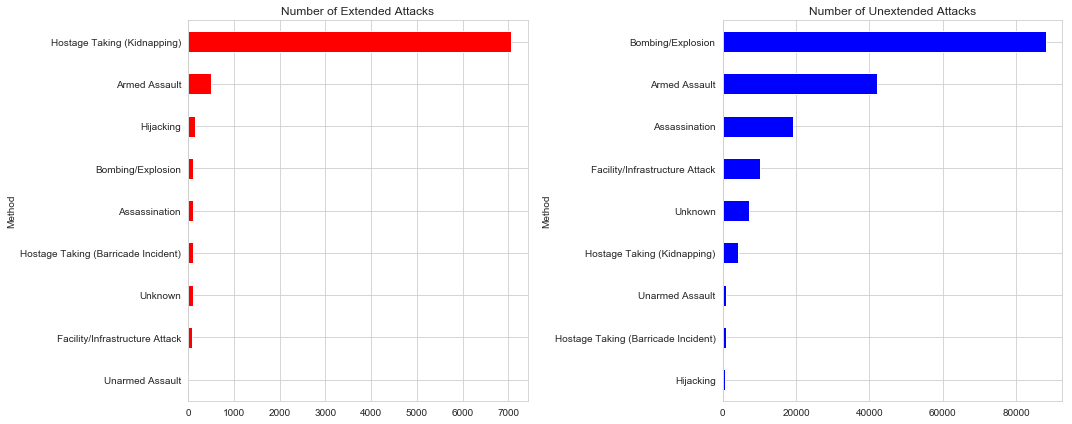

In [13]:
fig,ax = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
ax[0]=df[df['extended']==1].groupby('attacktype1_txt').count()['extended'].sort_values().plot.barh(color='red',ax=ax[0])
ax[1]=df[df['extended']==0].groupby('attacktype1_txt').count()['extended'].sort_values().plot.barh(color='blue',ax=ax[1])
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()

Extended attacks overwhelmingly consist of hostage taking. On the other hand, extended attacks seem to be a bit more spread between bombings/explosions, armed assaults, and assassinations.

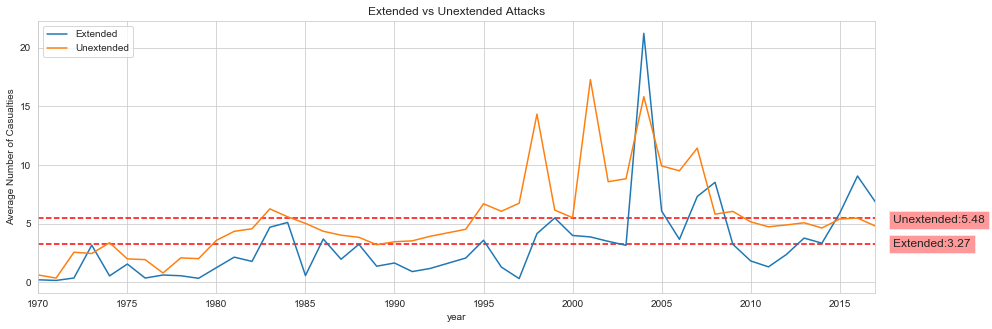

In [14]:
fig,axes = plt.subplots(figsize=(15,5))
ext_casualties = df[df['extended']==1].groupby('iyear').mean()['casualties']
ext_casualties.plot()
unext_casualties = df[df['extended']==0].groupby('iyear').mean()['casualties']
unext_casualties.plot()
plt.title('Extended vs Unextended Attacks')
plt.xlabel('year')
plt.xlim(1970,2017)
plt.xticks(np.arange(1970,2017,5))
plt.ylabel('Average Number of Casualties')
plt.hlines(y=ext_casualties.mean(),colors='red',xmin=1970,xmax=2017,linestyles='--')
plt.hlines(y=unext_casualties.mean(),colors='red',xmin=1970,xmax=2017,linestyles='--')
plt.text(2018, 3, 'Extended:3.27',fontsize=12,bbox=dict(facecolor='red', alpha=0.4))
plt.text(2018, 5.1, 'Unextended:5.48',fontsize=12,bbox=dict(facecolor='red', alpha=0.4))
axes.legend(labels=['Extended','Unextended'],loc='upper left')
plt.show()

Unextended attacks seem to have been historically more lethal, with on average 2.2 more casualties than extended attacks. This is expected given the fact that bombings and explosions are the most used form of terrorism. Generally, these events happen in a shorter timeframe but are outright more destructive than extended attacks such as hostage takings.